In [1]:
!git clone https://github.com/google-research/google-research.git
!pip install tensorflow

In [1]:
import sys
sys.path.append('./google-research')

In [2]:
from android_in_the_wild import visualization_utils
import tensorflow as tf
import random

2023-08-23 03:00:27.646641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
dataset_directories = {
    'google_apps': './google_apps/*',
    'general': './general/*',
    'install': './install/*',
    'single': './single/*',
    'web_shopping': './web_shopping/*',
}

## Choose a dataset_name to look

In [4]:
dataset_name = 'web_shopping'  #@param ["general", "google_apps", "install", "single", "web_shopping"]

In [5]:
filenames = tf.io.gfile.glob(dataset_directories[dataset_name])
raw_dataset = tf.data.TFRecordDataset(filenames, compression_type='GZIP').as_numpy_iterator()

In [6]:
import numpy as np
from collections import defaultdict

devices_dict = defaultdict(int)

for ct, raw_record in enumerate(raw_dataset):
    example = tf.train.Example()
    example.ParseFromString(raw_record)
    result = {}
    # example.features.feature is the dictionary
    try:
        for key, feature in example.features.feature.items():
            # The values are the Feature objects which contain a `kind` which contains:
            # one of three fields: bytes_list, float_list, int64_list

            kind = feature.WhichOneof('kind')
            result[key] = np.array(getattr(feature, kind).value)
        devices_dict[str(result["device_type"])] += 1
    except:
        pass
    
    if ct > 10:
        break


In [7]:
def get_episode(dataset):
    """Grabs the first complete episode."""
    episode = []
    episode_id = None
    for d in dataset:
        ex = tf.train.Example()
        ex.ParseFromString(d)
        print(ex)
        ep_id = ex.features.feature['episode_id'].bytes_list.value[0].decode('utf-8')
        if episode_id is None:
            episode_id = ep_id
            episode.append(ex)
        elif ep_id == episode_id:
            episode.append(ex)
        else:
            break
    return episode

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



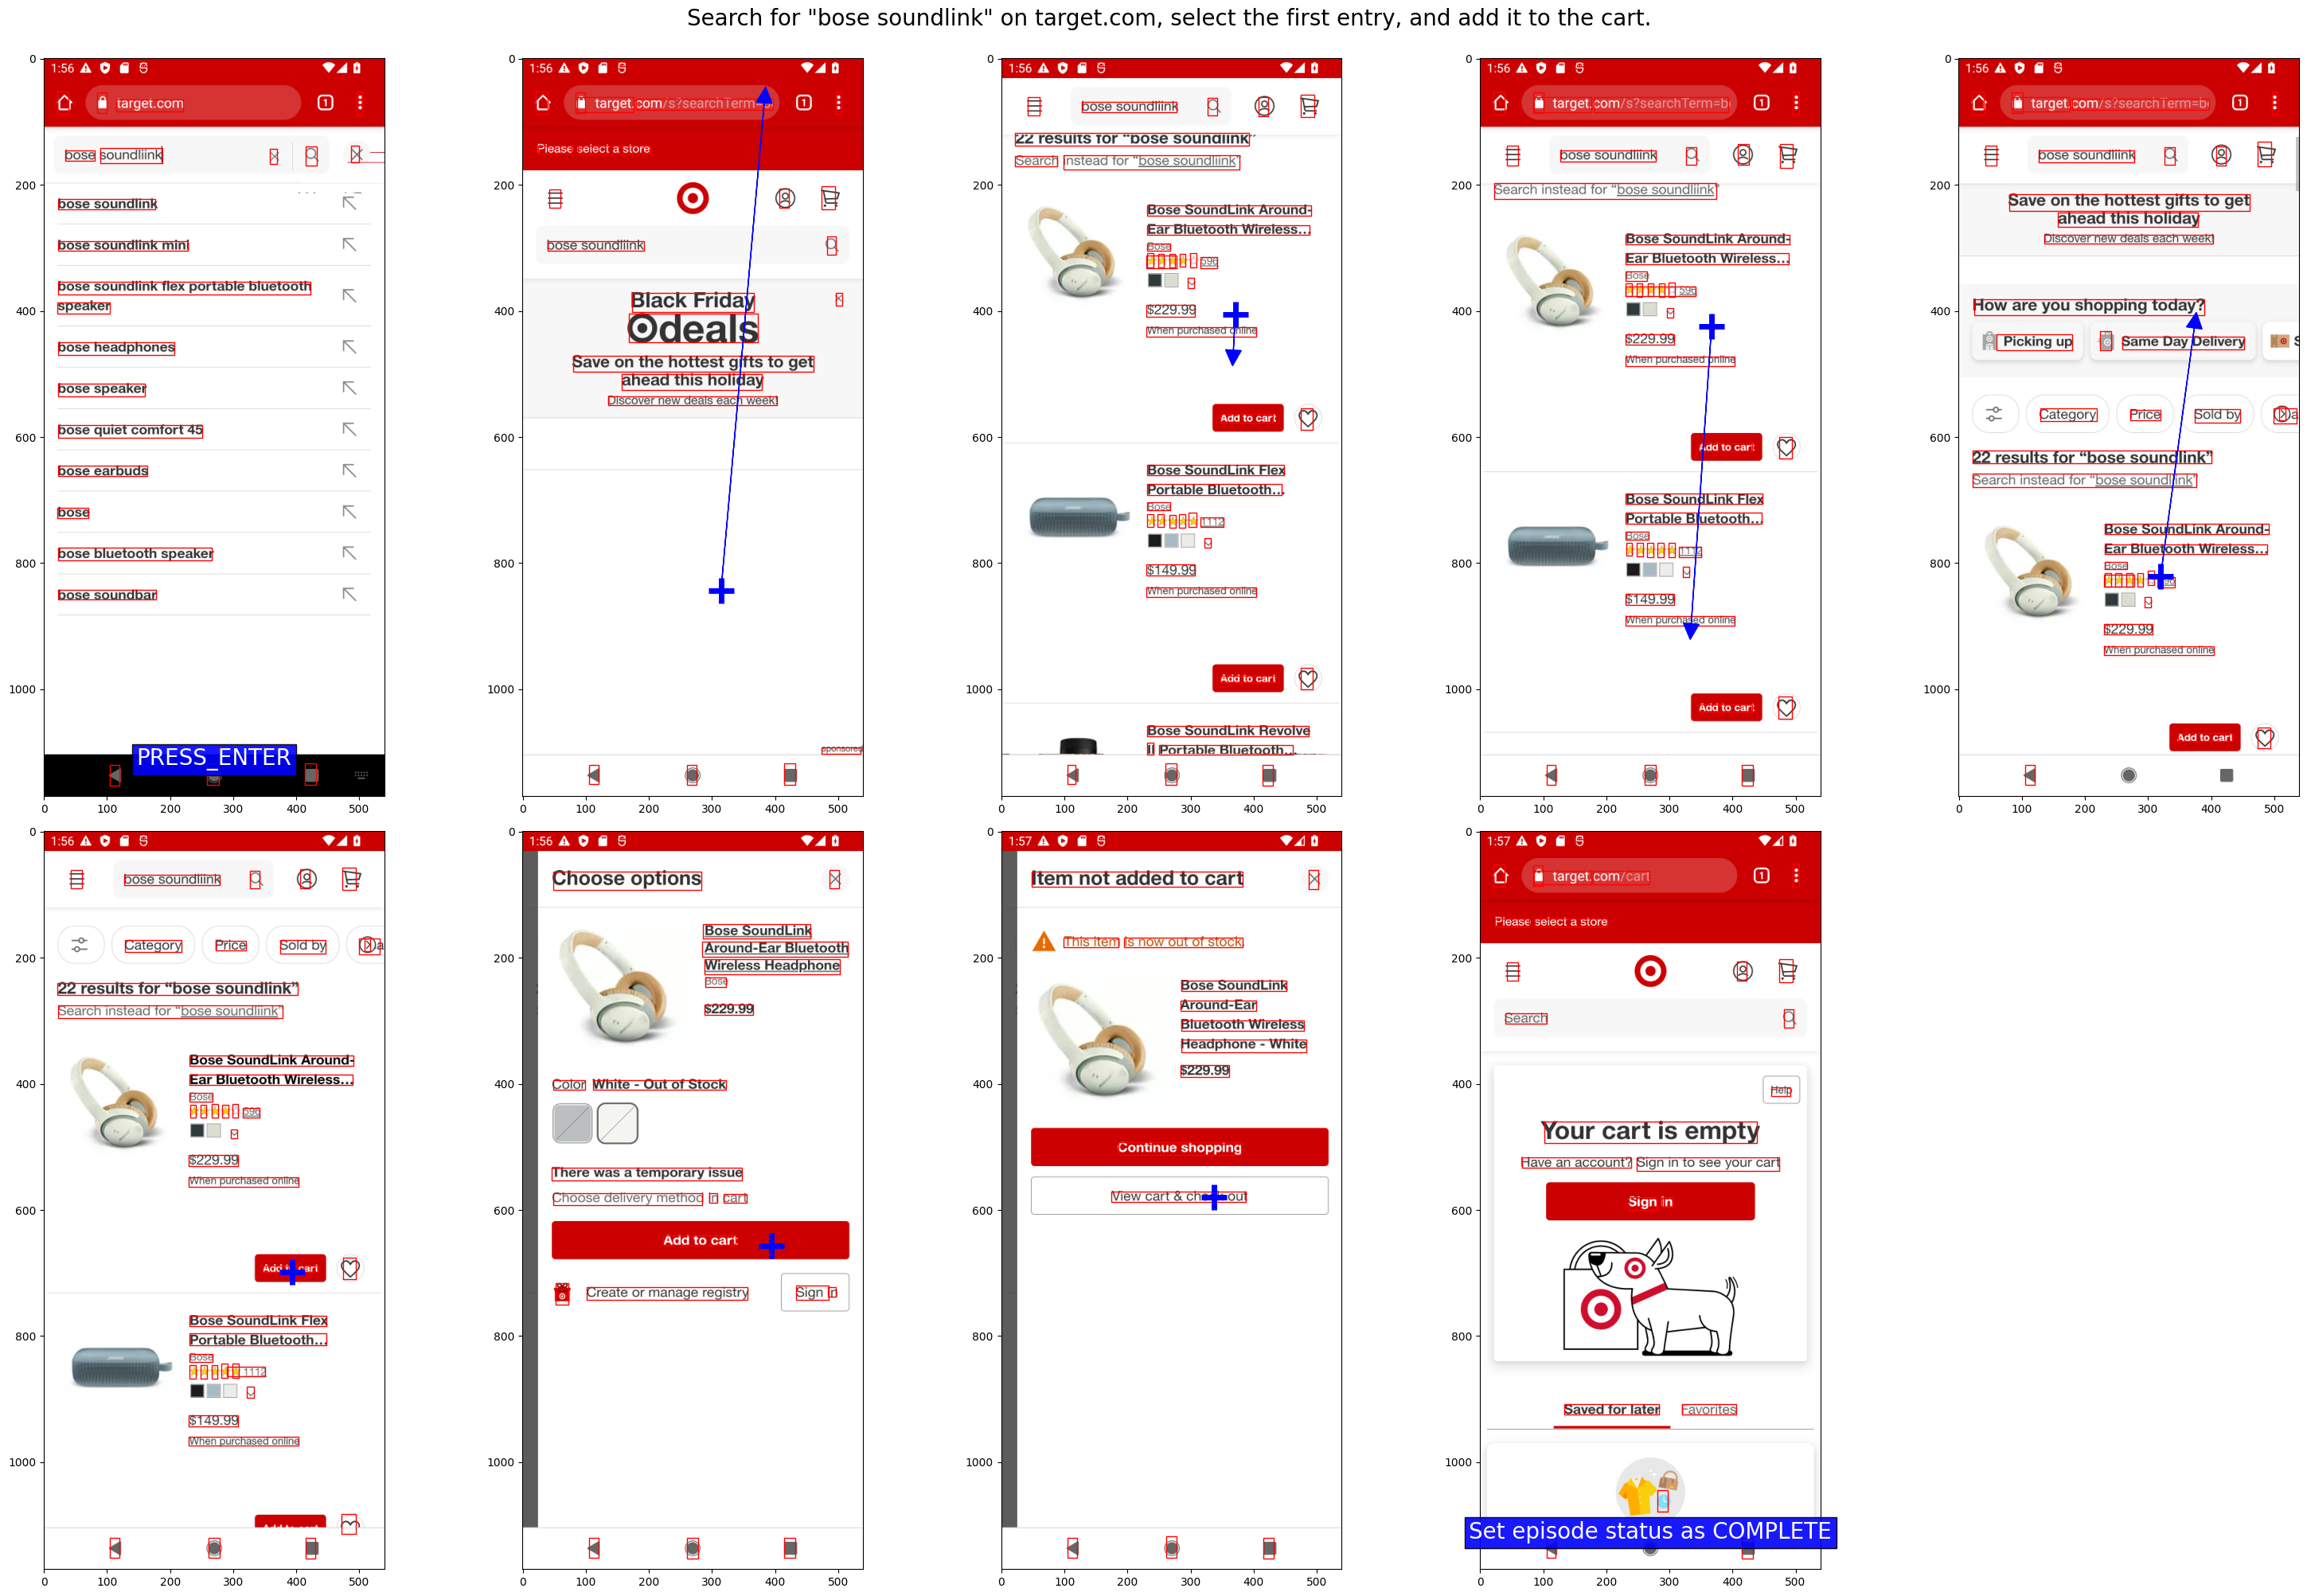

In [8]:
ep = get_episode(raw_dataset)
visualization_utils.plot_episode(ep, show_annotations=True, show_actions=True)

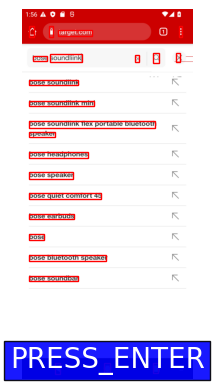

ct: 0
	device: [b'PIXEL_5']
	action: PRESS_ENTER
	yx_touch: [-1. -1.]
	yx_lift: [-1. -1.]
	goal_info: [b'Search for "bose soundlink" on target.com, select the first entry, and add it to the cart.']
	ui_annotations_text: [b'' b'' b'' b'target.com' b'' b'' b'soundliink' b'X' b'bose'
 b'bose soundlink' b'bose soundlink mini'
 b'bose soundlink flex portable bluetooth' b'speaker' b'bose headphones'
 b'bose speaker' b'bose quiet comfort 45' b'bose earbuds' b'bose'
 b'bose bluetooth speaker' b'bose soundbar' b'' b'' b'']


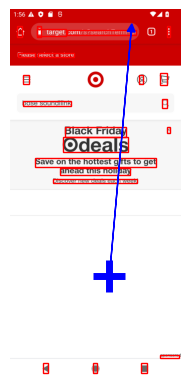

ct: 1
	device: [b'PIXEL_5']
	action: DUAL_POINT
	yx_touch: [0.72120667 0.58204025]
	yx_lift: [0.05988896 0.70909119]
	goal_info: [b'Search for "bose soundlink" on target.com, select the first entry, and add it to the cart.']
	ui_annotations_text: [b'' b'' b'' b'target.' b'com/s?searchTerm =b\xc4\xb1' b'Please'
 b'select a store' b'' b'' b'' b'' b'bose soundliink' b'Black Friday' b'X'
 b'Odeals' b'Save on the hottest gifts to get' b'ahead this holiday'
 b'Discover new deals each week!' b'sponsored' b'' b'' b'']


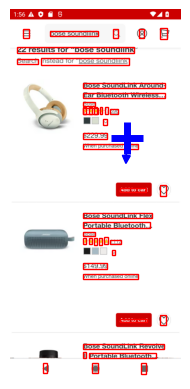

ct: 2
	device: [b'PIXEL_5']
	action: DUAL_POINT
	yx_touch: [0.34689337 0.68658334]
	yx_lift: [0.39501569 0.68104184]
	goal_info: [b'Search for "bose soundlink" on target.com, select the first entry, and add it to the cart.']
	ui_annotations_text: [b'' b'' b'' b'' b'bose soundliink' b'22 resuits Tor "bose sounainK'
 b'instead for "bose soundliink"' b'Search' b'Bose SoundLink Around-'
 b'Ear Bluetooth Wireless...' b'Bose' b'' b'' b'' b'' b'' b'tt' b'596' b''
 b'$229.99' b'When purchased online' b'' b'Add to cart'
 b'Bose SoundLink Flex' b'Portable Bluetooth...' b'Bose' b'' b'' b'' b''
 b'*' b'1112' b'' b'$149.99' b'When purchased online' b'' b'Add to cart'
 b'Bose SoundLink Revolve' b'II' b'Portable Bluetaoth..' b'' b'' b'']


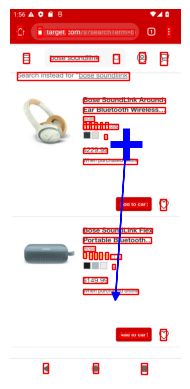

ct: 3
	device: [b'PIXEL_5']
	action: DUAL_POINT
	yx_touch: [0.36339277 0.67940015]
	yx_lift: [0.76585376 0.61980647]
	goal_info: [b'Search for "bose soundlink" on target.com, select the first entry, and add it to the cart.']
	ui_annotations_text: [b'' b'' b'' b'target.' b'com/s?searchTerm =b' b'' b'' b'' b''
 b'bose soundlink' b'Search instead for "bose soundlink"'
 b'Bose SoundLink Around-' b'Ear Bluetooth Wireless...' b'Bose' b'' b''
 b'' b'' b'' b'*tt 596' b'' b'$229.99' b'When purchased online' b''
 b'Add to cart' b'Bose SoundLink Flex' b'Portable Bluetooth..' b'Bose' b''
 b'' b'' b'' b't' b'1112' b'' b'$149.99' b'When purchased online' b''
 b'Add to cart' b'' b'' b'']


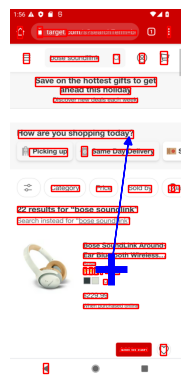

ct: 4
	device: [b'PIXEL_5']
	action: DUAL_POINT
	yx_touch: [0.70197511 0.59216177]
	yx_lift: [0.36507604 0.69110757]
	goal_info: [b'Search for "bose soundlink" on target.com, select the first entry, and add it to the cart.']
	ui_annotations_text: [b'' b'' b'' b'target.' b'com/s?searchTerm =b\xc4\xb1' b'' b'' b'' b''
 b'bose soundliink' b'Save on the hottest gifts to get'
 b'ahead this holiday' b'Discover new deals each week!'
 b'How are you shopping today?' b'o' b'Picking up' b'Same Day Delivery'
 b'' b'Oa' b'Category' b'Sold by' b'Price'
 b'22 results for "bose soundlink"' b'Search instead for "bose soundlink"'
 b'Bose SoundLink Around-' b'Ear Bluetooth Wireless...' b'Bose' b'' b''
 b'' b'' b'' b'tt' b'596' b'' b'$229.99' b'When purchased online' b''
 b'Add to cart' b'']


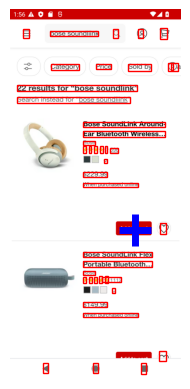

ct: 5
	device: [b'PIXEL_5']
	action: DUAL_POINT
	yx_touch: [0.59723824 0.7297194 ]
	yx_lift: [0.59723824 0.7297194 ]
	goal_info: [b'Search for "bose soundlink" on target.com, select the first entry, and add it to the cart.']
	ui_annotations_text: [b'' b'' b'' b'' b'bose soundlink' b'Oa' b'' b'Category' b'Sold by'
 b'Price' b'22 results for "bose soundlink"'
 b'Search instead for "bose soundlink"' b'Bose SoundLink Around-'
 b'Ear Bluetooth Wireless...' b'Bose' b'' b'' b'' b't' b'' b'596' b''
 b'$229.99' b'When purchased online' b'' b'Add to cart'
 b'Bose SoundLink Flex' b'Portable Bluetooth...' b'Bose' b'' b'' b'' b''
 b'' b'1112' b'' b'$149.99' b'When purchased online' b'' b'' b'' b'']


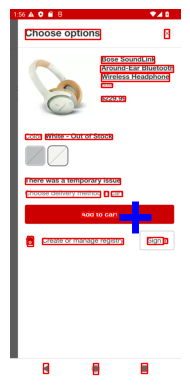

ct: 6
	device: [b'PIXEL_5']
	action: DUAL_POINT
	yx_touch: [0.56107998 0.73107404]
	yx_lift: [0.56107998 0.73107404]
	goal_info: [b'Search for "bose soundlink" on target.com, select the first entry, and add it to the cart.']
	ui_annotations_text: [b'' b'Choose options' b'Bose SoundLink' b'Around-Ear Bluetooth'
 b'Wireless Headphone' b'Bose' b'$229.99' b'Color' b'White - Out of Stock'
 b'There was a temporary issue' b'Choose delivery method' b'in' b'cart'
 b'Add to cart' b'o' b'Sign i' b'Create or manage registry' b'in' b'' b''
 b'']


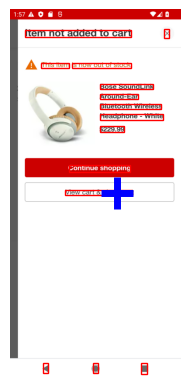

ct: 7
	device: [b'PIXEL_5']
	action: DUAL_POINT
	yx_touch: [0.49537522 0.62426507]
	yx_lift: [0.49537522 0.62426507]
	goal_info: [b'Search for "bose soundlink" on target.com, select the first entry, and add it to the cart.']
	ui_annotations_text: [b'X' b'Item not added to cart' b'This item' b'is now out of stock.'
 b'Bose SoundLink' b'Around-Ear' b'Bluetooth Wireless'
 b'Headphone - White' b'$229.99' b'Continue shopping'
 b'View cart & check out' b'' b'' b'']


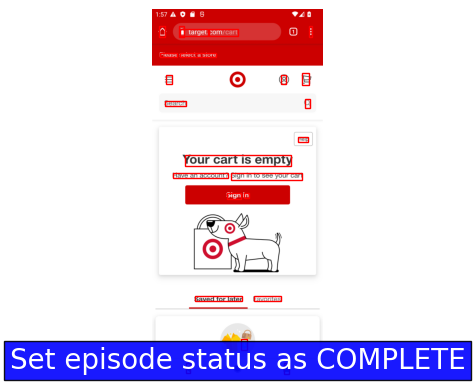

ct: 8
	device: [b'PIXEL_5']
	action: STATUS_TASK_COMPLETE
	yx_touch: [-1. -1.]
	yx_lift: [-1. -1.]
	goal_info: [b'Search for "bose soundlink" on target.com, select the first entry, and add it to the cart.']
	ui_annotations_text: [b'' b'' b'' b'^ target.' b'com/cart' b'Please' b'select a store' b'' b''
 b'' b'' b'Search' b'Help' b'Your cart is empty' b'Have an account?'
 b'Sign in to see your cart' b'Sign' b'in' b'Saved for later' b'Favorites'
 b'' b'' b'']


In [9]:
#   TYPE = 3

#   # The dual point action used to represent all gestures.
#   DUAL_POINT = 4

#   # These actions differentiate pressing the home and back button from touches.
#   # They represent explicit presses of back and home performed using ADB.
#   PRESS_BACK = 5
#   PRESS_HOME = 6

#   # An action representing that ADB command for hitting enter was performed.
#   PRESS_ENTER = 7

#   ########### Episode status actions ###########

#   # An action used to indicate the desired task has been completed and resets
#   # the environment. This action should also be used in the case that the task
#   # has already been completed and there is nothing to do.
#   # e.g. The task is to turn on the Wi-Fi when it is already on
#   STATUS_TASK_COMPLETE = 10

#   # An action used to indicate that desired task is impossible to complete and
#   # resets the environment. This can be a result of many different things
#   # including UI changes, Android version differences, etc.
#   STATUS_TASK_IMPOSSIBLE = 11
import matplotlib.pyplot as plt

action_map = {
     3: "TYPE",
     4: "DUAL_POINT", #put down and lift, therefore is also one
     5: "PRESS_BACK",
     6: "PRESS_HOME",
     7: "PRESS_ENTER",
    10: "STATUS_TASK_COMPLETE",
    11: "STATUS_TASK_IMPOSSIBLE"
}

for ct, example in enumerate(ep):
    result = {}
    # example.features.feature is the dictionary
    try:
        for key, feature in example.features.feature.items():
            # The values are the Feature objects which contain a `kind` which contains:
            # one of three fields: bytes_list, float_list, int64_list

            kind = feature.WhichOneof('kind')
            result[key] = np.array(getattr(feature, kind).value)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.axis('off')
        visualization_utils.plot_example(example, True, True, ax)
        plt.show()
        print("ct:", ct)
        print("\tdevice:", result["device_type"])
        print("\taction:", action_map[result["results/action_type"][0]])
        print("\tyx_touch:", result["results/yx_touch"])
        print("\tyx_lift:", result["results/yx_lift"])
        print("\tgoal_info:", result["goal_info"])
#         print("\tui_annotations_positions:", result["image/ui_annotations_positions"])
        print("\tui_annotations_text:", result["image/ui_annotations_text"])
    except Exception as e:
        print(e)
        pass